# Import Libraries

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import Data

In [109]:
data = pd.read_excel(r'Heart_Disease.xlsx')

# Getting some info about the data

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Statistical measures about the data

In [111]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# First 5 rows in the dataset

In [112]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# Last 5 rows in the dataset

In [113]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No
319794,No,46.56,No,No,No,0,0,No,Female,80 or older,Hispanic,No,Yes,Good,8,No,No,No


# Getting types for each feature

In [114]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# Number of rows and columns in the dataset

In [115]:
data.shape

(319795, 18)

# Checking for missing values

In [116]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No missing values.

# Number of duplicated rows

In [117]:
data.duplicated().sum()

18078

In [118]:
data.drop_duplicates(inplace=True)

In [119]:
data.duplicated().sum()

0

No duplicated row 

# Number of rows and columns in the dataset after remove duplicated row

In [120]:
data.shape

(301717, 18)

# Histogram for some feature 

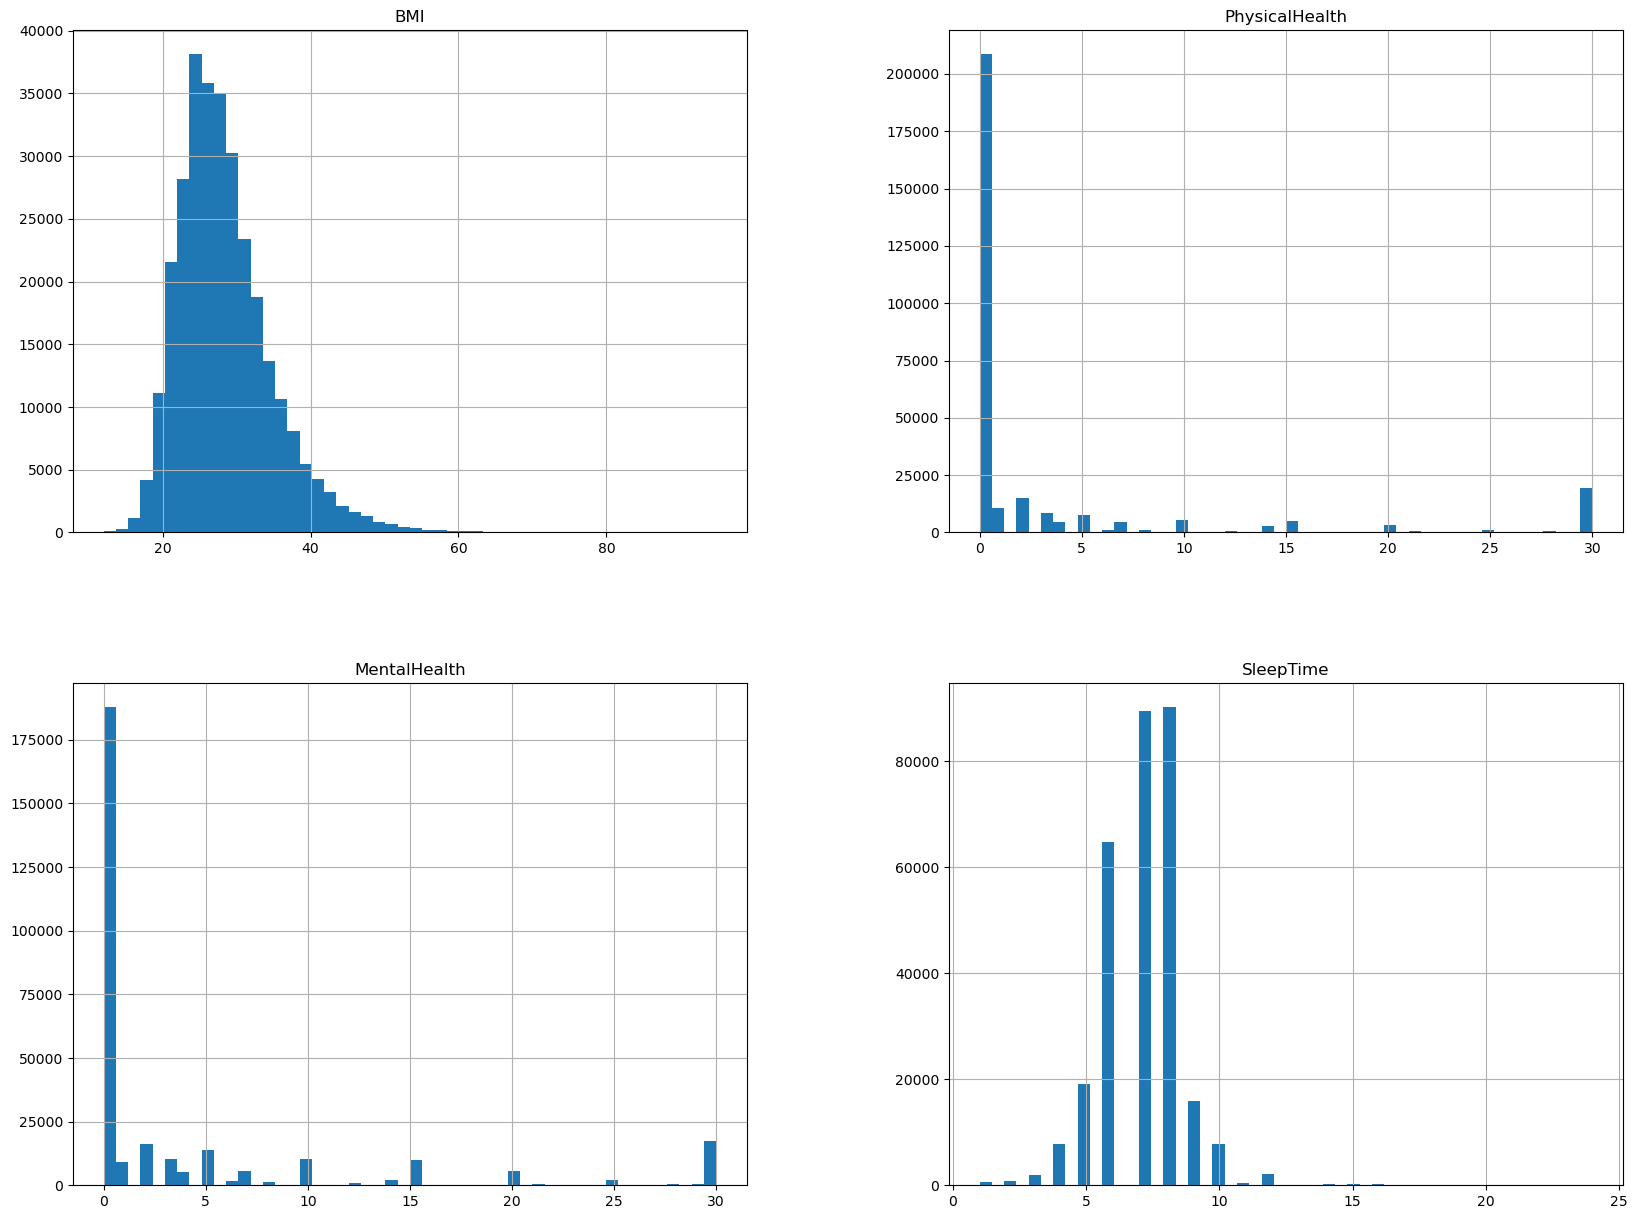

In [121]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [122]:
import seaborn as sns

<Axes: xlabel='Smoking', ylabel='count'>

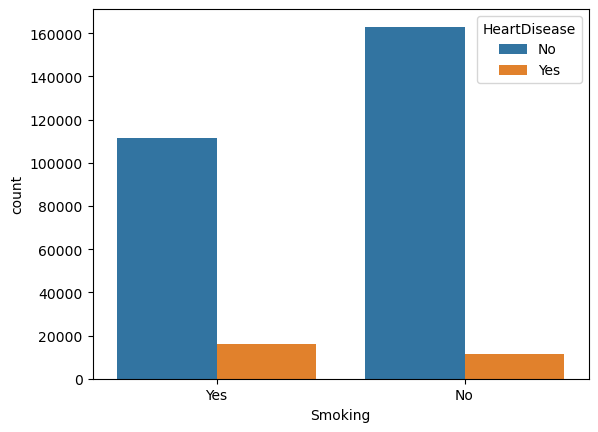

In [123]:
sns.countplot(x='Smoking',hue='HeartDisease',data=data)

<Axes: xlabel='AlcoholDrinking', ylabel='count'>

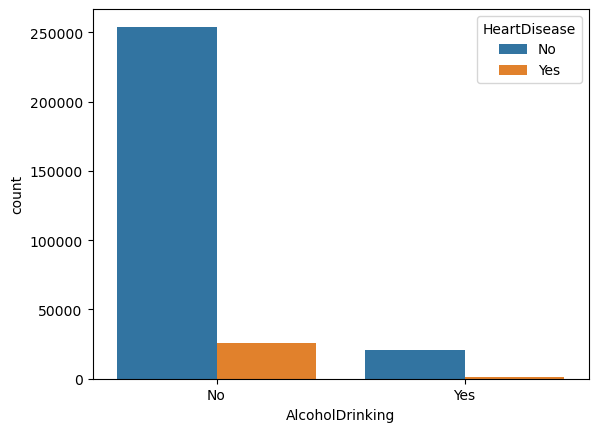

In [124]:
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=data)

<Axes: xlabel='Stroke', ylabel='count'>

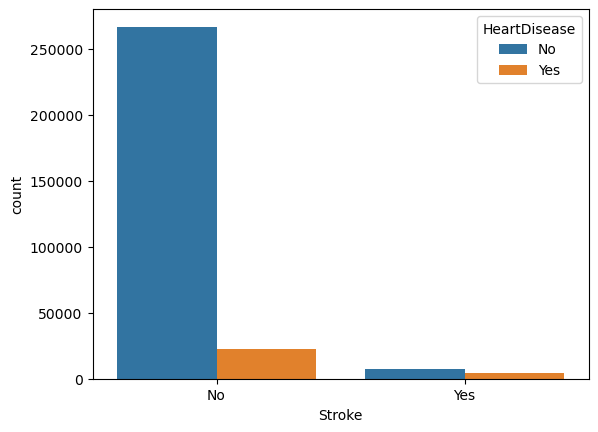

In [125]:
sns.countplot(x='Stroke',hue='HeartDisease',data=data)

<Axes: xlabel='DiffWalking', ylabel='count'>

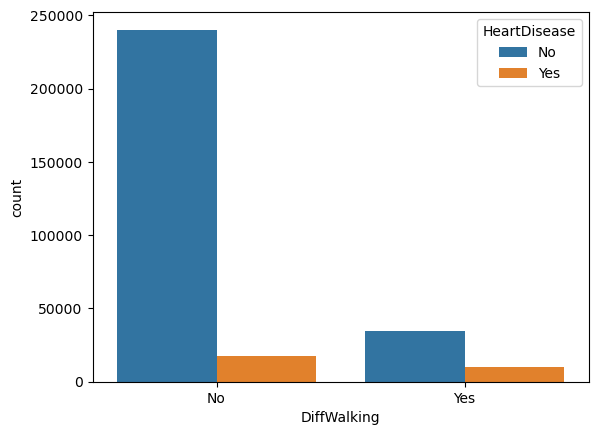

In [126]:
sns.countplot(x='DiffWalking',hue='HeartDisease',data=data)

<Axes: xlabel='Sex', ylabel='count'>

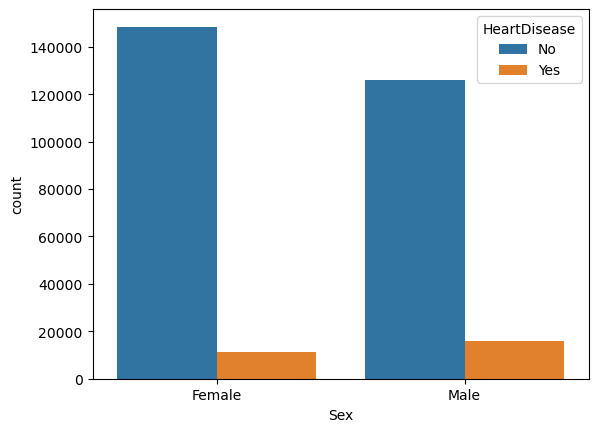

In [127]:
sns.countplot(x='Sex',hue='HeartDisease',data=data)

<Axes: xlabel='Asthma', ylabel='count'>

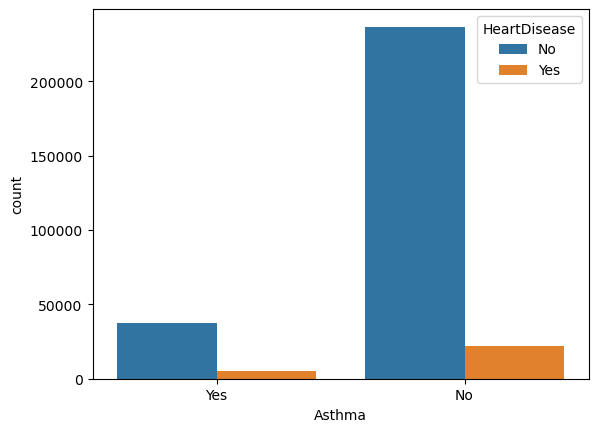

In [128]:
sns.countplot(x='Asthma',hue='HeartDisease',data=data)

<Axes: xlabel='PhysicalActivity', ylabel='count'>

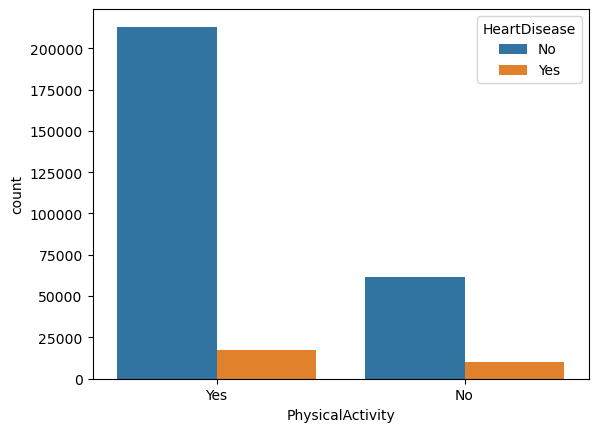

In [129]:
sns.countplot(x='PhysicalActivity',hue='HeartDisease',data=data)

<Axes: xlabel='KidneyDisease', ylabel='count'>

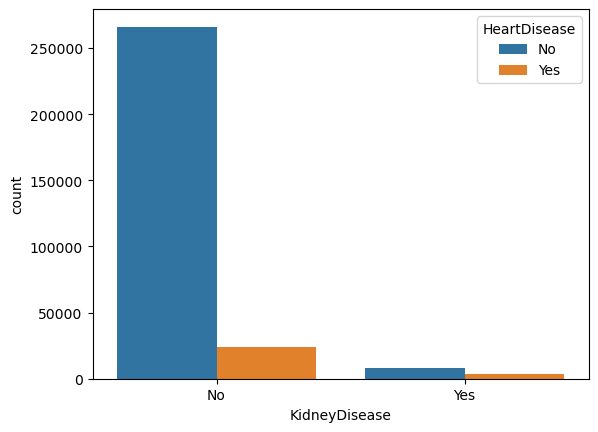

In [130]:
sns.countplot(x='KidneyDisease',hue='HeartDisease',data=data)

<Axes: xlabel='SkinCancer', ylabel='count'>

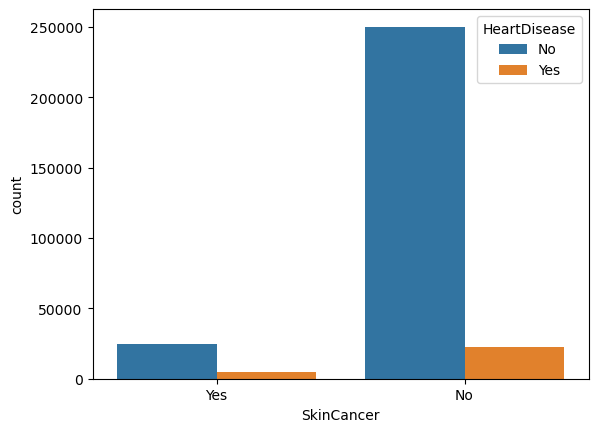

In [131]:
sns.countplot(x='SkinCancer',hue='HeartDisease',data=data)

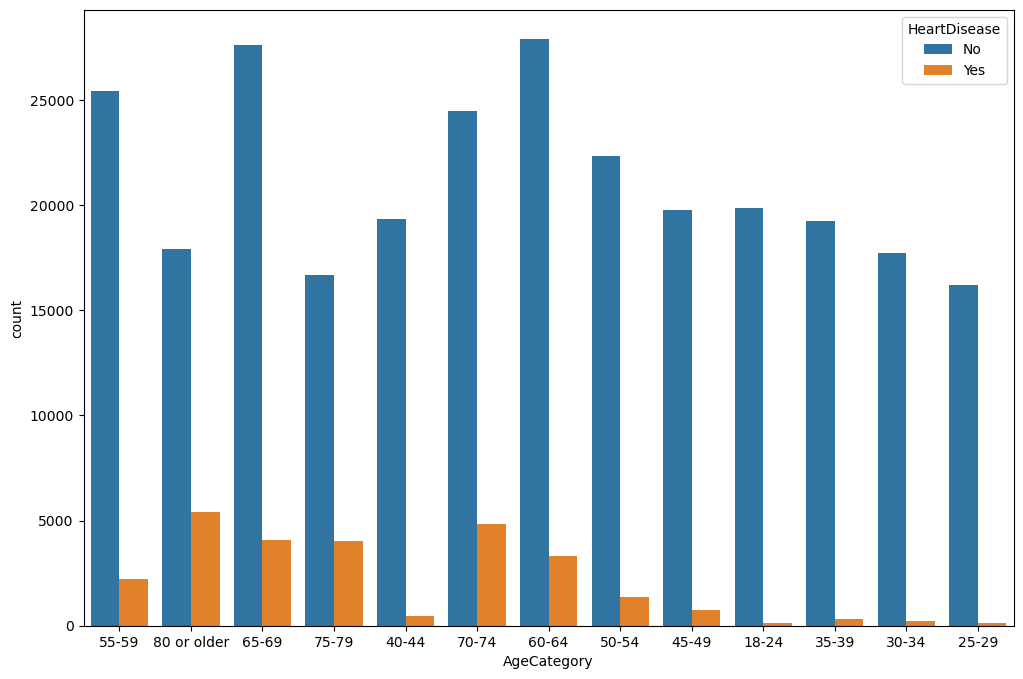

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=data)
plt.show()

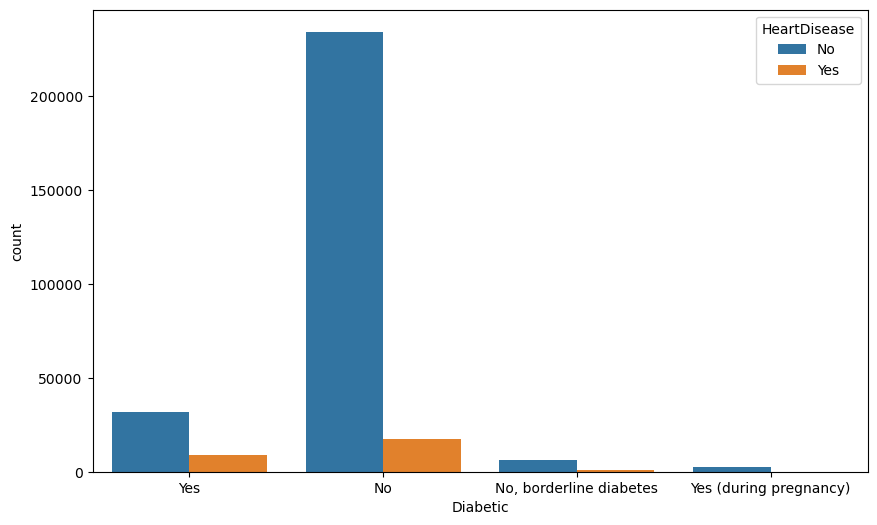

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetic', hue='HeartDisease', data=data)
plt.show()

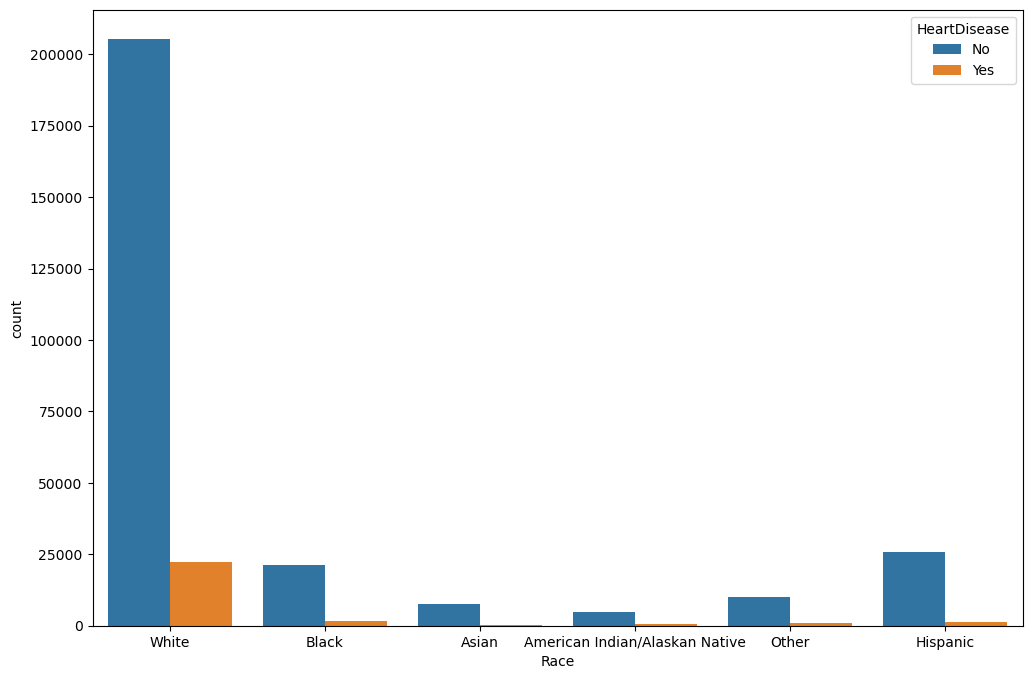

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.countplot(x='Race', hue='HeartDisease', data=data)
plt.show()

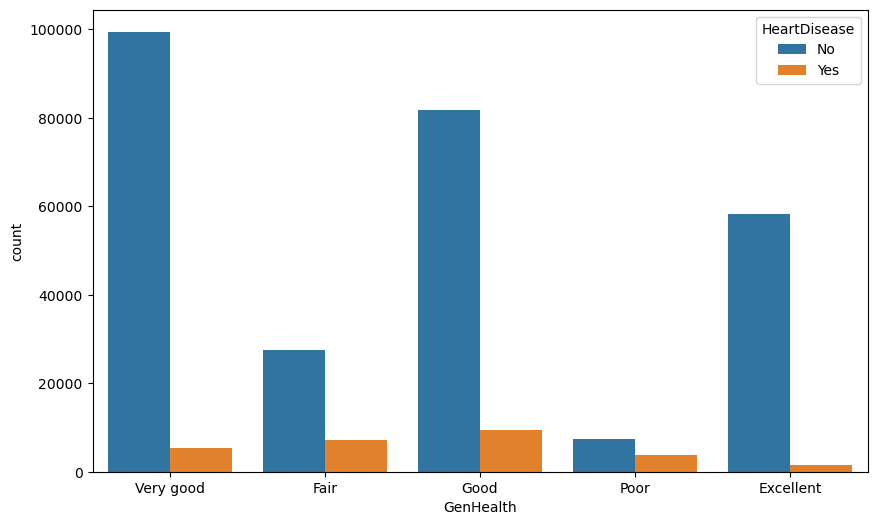

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHealth', hue='HeartDisease', data=data)
plt.show()

# Data preprocessing for balancing

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in list:
    data[i]=le.fit_transform(data[i])


# First 5 rows in the dataset

In [137]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


# Last 5 rows in the dataset

In [138]:
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,1,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0
319794,0,46.56,0,0,0,0,0,0,0,12,3,0,1,2,8,0,0,0


# Get Random data

In [139]:
data.sample(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
139693,0,26.63,0,0,0,2,0,0,0,8,5,0,1,4,8,0,0,0
92312,0,29.05,1,0,0,1,0,0,0,12,5,0,1,2,7,0,0,0
75572,0,28.89,0,0,0,0,0,0,1,3,5,0,1,0,9,0,0,0
311378,1,23.89,1,0,0,5,20,1,0,12,5,2,0,1,9,0,0,0
51955,0,23.30,1,0,0,0,0,0,0,7,5,0,1,4,7,0,0,0
25064,0,27.34,0,0,0,0,0,0,0,7,5,0,1,4,8,0,0,0
21449,0,25.84,0,0,0,2,1,0,0,6,5,0,1,4,6,0,0,1
259458,0,20.02,1,0,0,0,0,0,0,8,5,0,1,2,8,0,0,0
257135,0,29.44,1,0,0,0,0,0,1,11,5,2,1,4,1,0,0,0
307350,0,24.28,1,0,0,0,0,0,1,8,5,0,1,4,7,0,0,1


# Getting types for each feature

In [140]:
data.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime             int64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

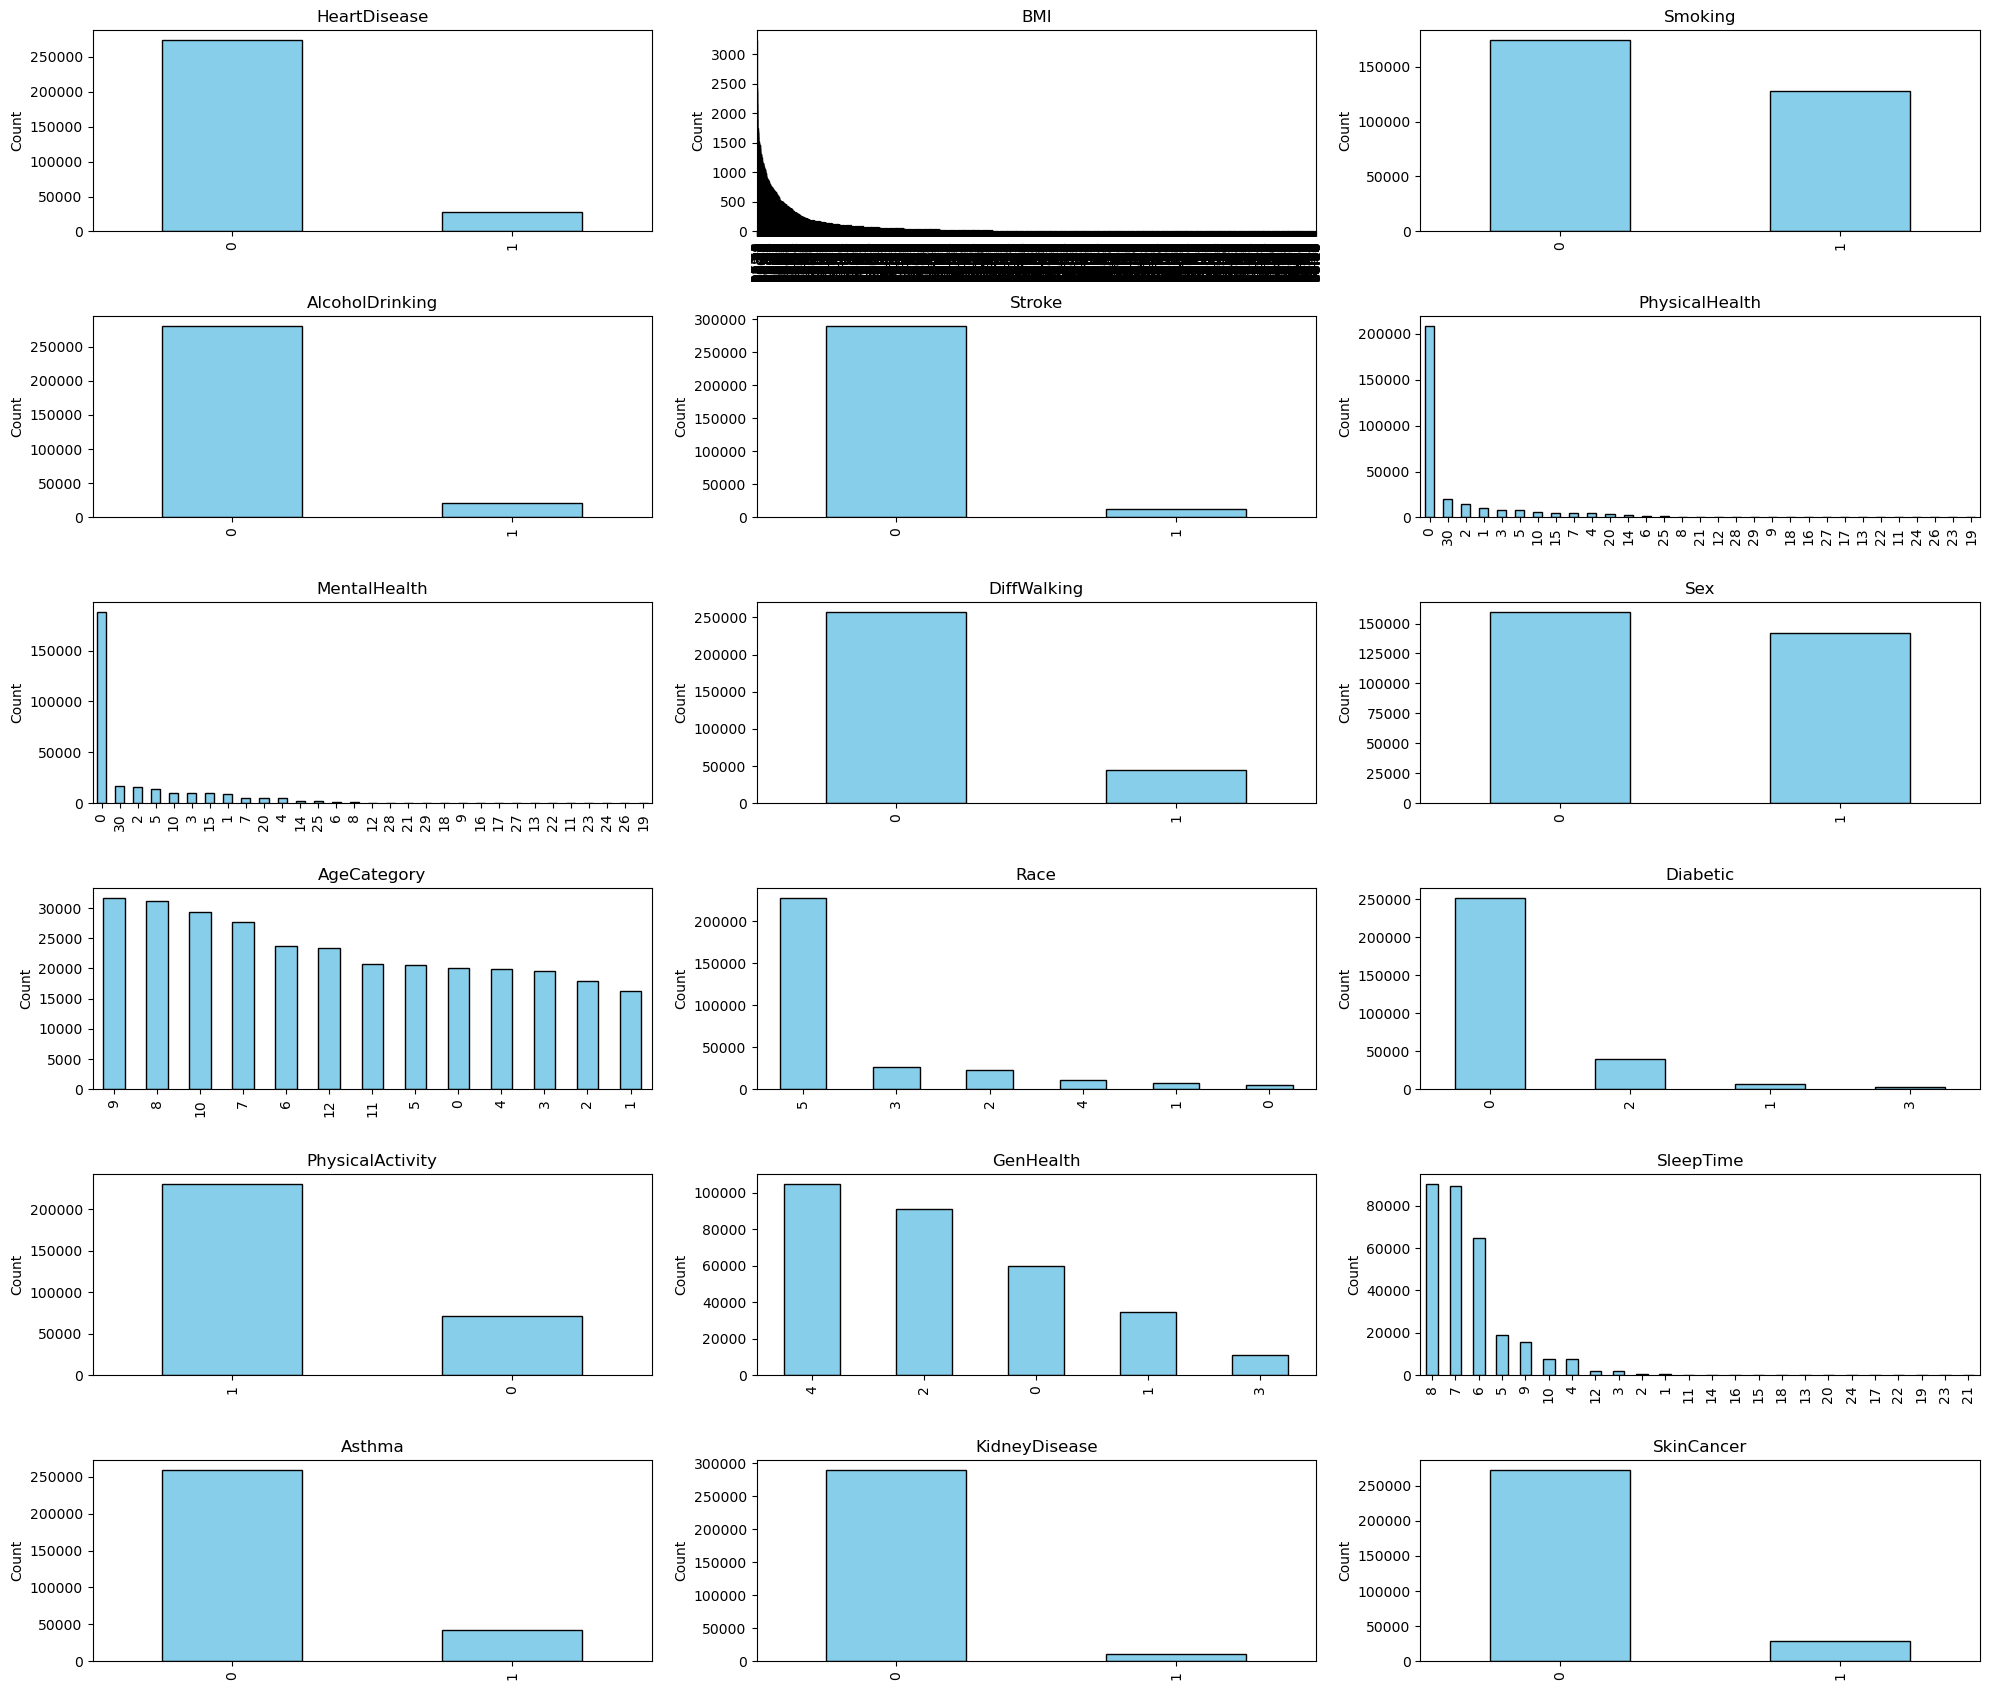

In [141]:
features = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 17))

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    data[feature].value_counts().plot(kind='bar', ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Looking for Correlations

array([[<Axes: xlabel='HeartDisease', ylabel='HeartDisease'>,
        <Axes: xlabel='BMI', ylabel='HeartDisease'>,
        <Axes: xlabel='Smoking', ylabel='HeartDisease'>,
        <Axes: xlabel='AlcoholDrinking', ylabel='HeartDisease'>,
        <Axes: xlabel='Stroke', ylabel='HeartDisease'>,
        <Axes: xlabel='PhysicalHealth', ylabel='HeartDisease'>],
       [<Axes: xlabel='HeartDisease', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Smoking', ylabel='BMI'>,
        <Axes: xlabel='AlcoholDrinking', ylabel='BMI'>,
        <Axes: xlabel='Stroke', ylabel='BMI'>,
        <Axes: xlabel='PhysicalHealth', ylabel='BMI'>],
       [<Axes: xlabel='HeartDisease', ylabel='Smoking'>,
        <Axes: xlabel='BMI', ylabel='Smoking'>,
        <Axes: xlabel='Smoking', ylabel='Smoking'>,
        <Axes: xlabel='AlcoholDrinking', ylabel='Smoking'>,
        <Axes: xlabel='Stroke', ylabel='Smoking'>,
        <Axes: xlabel='PhysicalHealth', ylabel='Smoking'>],
       [<A

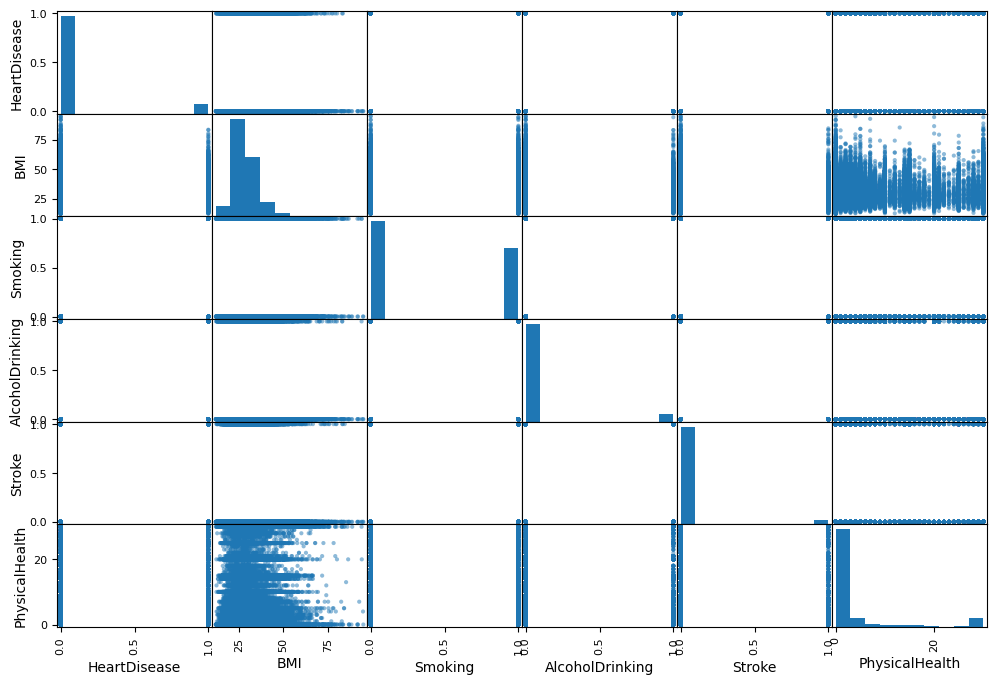

In [142]:
from pandas.plotting import scatter_matrix
attributes = ["HeartDisease", "BMI", "Smoking", "AlcoholDrinking" , "Stroke" , "PhysicalHealth"]
scatter_matrix(data[attributes], figsize=(12, 8))

array([[<Axes: xlabel='HeartDisease', ylabel='HeartDisease'>,
        <Axes: xlabel='MentalHealth', ylabel='HeartDisease'>,
        <Axes: xlabel='DiffWalking', ylabel='HeartDisease'>,
        <Axes: xlabel='Sex', ylabel='HeartDisease'>,
        <Axes: xlabel='AgeCategory', ylabel='HeartDisease'>,
        <Axes: xlabel='Race', ylabel='HeartDisease'>,
        <Axes: xlabel='Diabetic', ylabel='HeartDisease'>],
       [<Axes: xlabel='HeartDisease', ylabel='MentalHealth'>,
        <Axes: xlabel='MentalHealth', ylabel='MentalHealth'>,
        <Axes: xlabel='DiffWalking', ylabel='MentalHealth'>,
        <Axes: xlabel='Sex', ylabel='MentalHealth'>,
        <Axes: xlabel='AgeCategory', ylabel='MentalHealth'>,
        <Axes: xlabel='Race', ylabel='MentalHealth'>,
        <Axes: xlabel='Diabetic', ylabel='MentalHealth'>],
       [<Axes: xlabel='HeartDisease', ylabel='DiffWalking'>,
        <Axes: xlabel='MentalHealth', ylabel='DiffWalking'>,
        <Axes: xlabel='DiffWalking', ylabel='DiffWalki

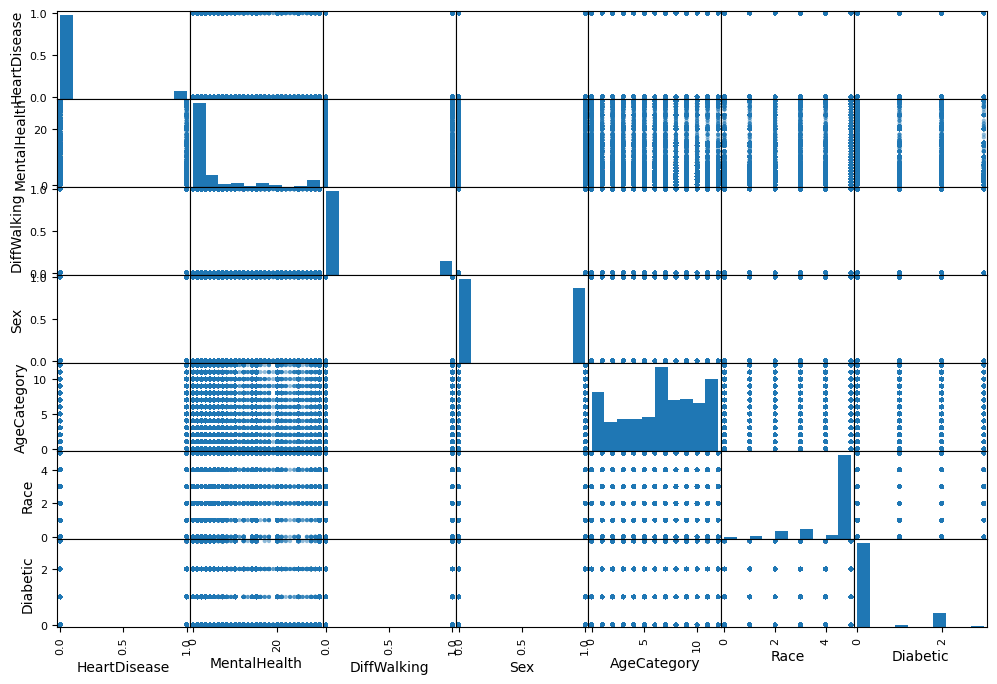

In [143]:
from pandas.plotting import scatter_matrix
attributes = ["HeartDisease","MentalHealth", "DiffWalking", "Sex", "AgeCategory" , "Race" , "Diabetic"]
scatter_matrix(data[attributes], figsize=(12, 8))

array([[<Axes: xlabel='HeartDisease', ylabel='HeartDisease'>,
        <Axes: xlabel='PhysicalActivity', ylabel='HeartDisease'>,
        <Axes: xlabel='GenHealth', ylabel='HeartDisease'>,
        <Axes: xlabel='SleepTime', ylabel='HeartDisease'>,
        <Axes: xlabel='Asthma', ylabel='HeartDisease'>,
        <Axes: xlabel='KidneyDisease', ylabel='HeartDisease'>,
        <Axes: xlabel='SkinCancer', ylabel='HeartDisease'>],
       [<Axes: xlabel='HeartDisease', ylabel='PhysicalActivity'>,
        <Axes: xlabel='PhysicalActivity', ylabel='PhysicalActivity'>,
        <Axes: xlabel='GenHealth', ylabel='PhysicalActivity'>,
        <Axes: xlabel='SleepTime', ylabel='PhysicalActivity'>,
        <Axes: xlabel='Asthma', ylabel='PhysicalActivity'>,
        <Axes: xlabel='KidneyDisease', ylabel='PhysicalActivity'>,
        <Axes: xlabel='SkinCancer', ylabel='PhysicalActivity'>],
       [<Axes: xlabel='HeartDisease', ylabel='GenHealth'>,
        <Axes: xlabel='PhysicalActivity', ylabel='GenHealth'>

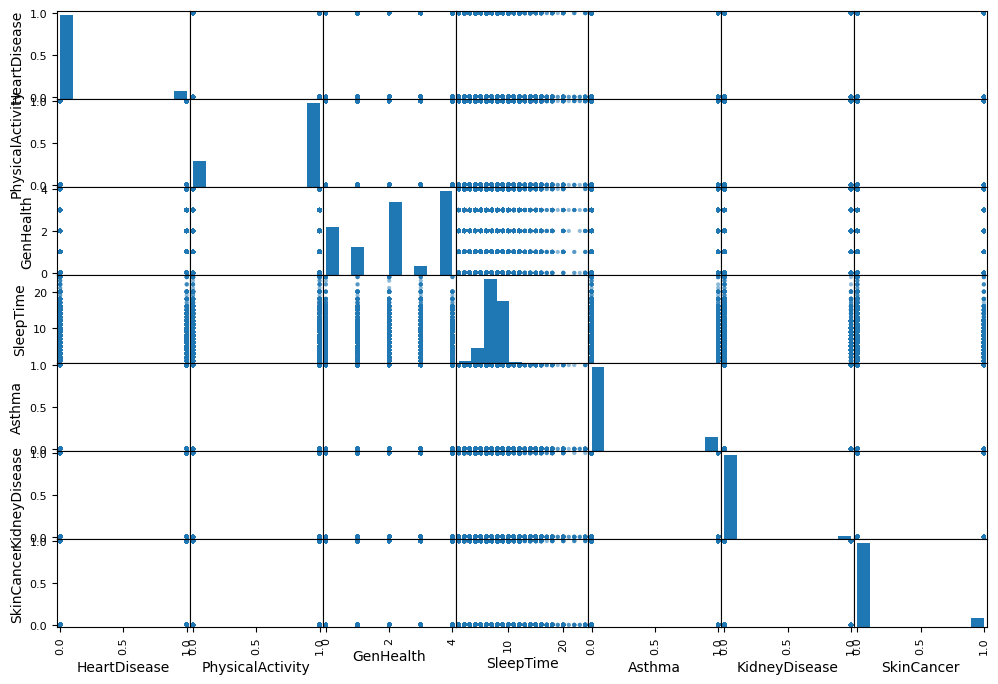

In [144]:
from pandas.plotting import scatter_matrix
attributes = ["HeartDisease","PhysicalActivity", "GenHealth", "SleepTime", "Asthma" , "KidneyDisease" , "SkinCancer"]
scatter_matrix(data[attributes], figsize=(12, 8))

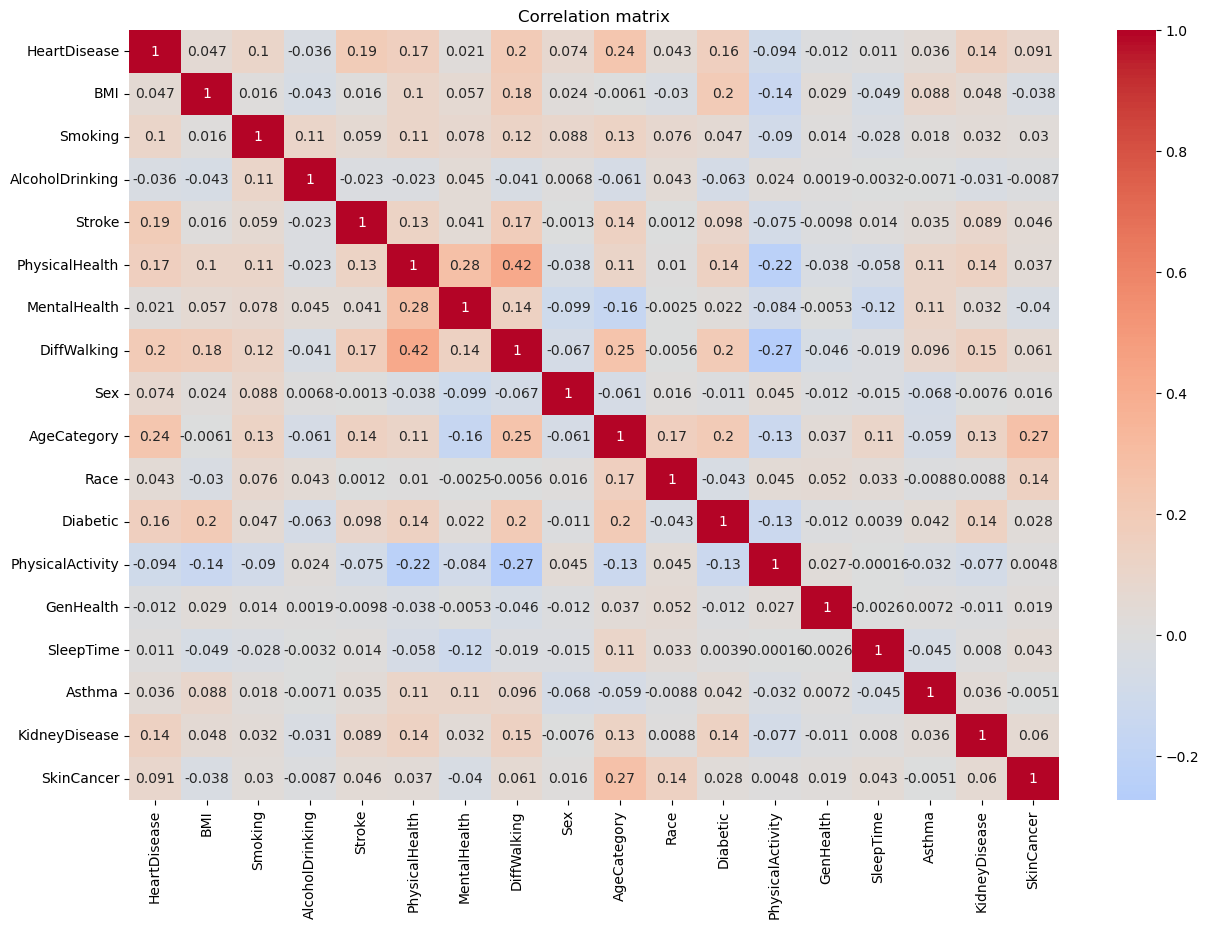

In [145]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

# Split Dataset into Train and Test

In [146]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Number of train set (80%)

In [147]:
len(train_set)

241373

In [148]:
print(train_set)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
197559             0  16.97        1                0       0               0   
286926             0  39.16        0                0       0               0   
250708             1  26.97        0                0       1              20   
155034             0  24.41        1                0       0               0   
102540             0  22.15        0                0       0               0   
...              ...    ...      ...              ...     ...             ...   
123014             0  27.57        0                0       0               0   
273086             0  17.97        1                0       0               0   
135728             0  28.34        0                0       0               9   
151731             1  22.43        1                0       0               5   
125198             0  21.11        0                0       0               0   

        MentalHealth  DiffW

## Number of test set (20%)

In [149]:
len(test_set)

60344

In [150]:
print(test_set)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
284798             0  35.59        0                0       0               0   
206219             0  27.80        0                0       0               0   
298442             0  25.79        0                0       0               2   
119751             1  38.47        1                0       1               1   
103309             0  27.32        0                0       0               0   
...              ...    ...      ...              ...     ...             ...   
255606             0  28.32        1                0       0               0   
67510              0  20.67        0                0       0               0   
123782             0  27.89        0                0       0               0   
313001             0  40.18        1                0       0               0   
261942             0  30.27        1                0       0               0   

        MentalHealth  DiffW

# Split Dataset into validation 

In [151]:
train_set, validation_set = train_test_split(train_set, test_size=0.20, random_state=42)

## Number of validation set (20%)

In [152]:
len(validation_set)

48275

In [153]:
print(validation_set)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
258465             0  38.01        1                0       0               0   
130941             0  23.59        1                0       0               5   
204700             1  23.18        1                0       0              15   
242944             0  28.75        0                0       0               3   
243861             0  27.46        0                0       0              28   
...              ...    ...      ...              ...     ...             ...   
305420             1  31.45        1                0       1               3   
170792             0  25.77        0                0       0               0   
256917             0  45.35        1                0       0               0   
195259             0  29.83        1                0       0               0   
280918             0  24.33        0                0       0               0   

        MentalHealth  DiffW

# Making a prediction using RandomForestClassifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
features = ['BMI', 'Smoking', 'AlcoholDrinking' ,'Stroke','PhysicalHealth' , 'MentalHealth','DiffWalking' ,'Sex' ,'AgeCategory' ,'Race' , 'Diabetic' , 'PhysicalActivity' , 'GenHealth' , 'SleepTime' , 'Asthma' , 'KidneyDisease' ,  'SkinCancer'] 
target_variable = 'HeartDisease'

X_train = train_set[features]
y_train = train_set[target_variable]
random_forest_model.fit(X_train, y_train)

if (random_forest_model.predict([['23.91','1','0','0','0','0','0','0','10','5','2','1','2','6','1','0','0']])):
    print("He has heart disease")
else:
    print("He does not have heart disease")

He has heart disease


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [155]:
if (random_forest_model.predict([['29.53','0','0','0','0','0','0','1','3','5','0','1','0','7','0','0','0']])):
    print("He has heart disease")
else:
    print("He does not have heart disease")

He does not have heart disease


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Prediction accuracy by using RandomForestClassifier

In [156]:
from sklearn.metrics import accuracy_score

X_test = test_set[features]
y_test = test_set[target_variable]
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')


Accuracy on the test set: 0.8993603340845817


# Predictions vs Feature

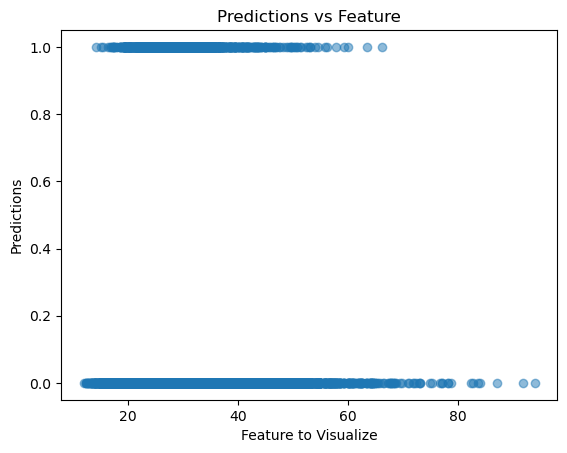

In [157]:
feature_to_visualize = X_test.iloc[:, 0]
y_pred = random_forest_model.predict(X_test)
plt.scatter(feature_to_visualize, y_pred, alpha=0.5)
plt.xlabel("Feature to Visualize")
plt.ylabel("Predictions")
plt.title("Predictions vs Feature")
plt.show()

In [158]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
print(pred_y_df.head(20))

        Actual Value  Predicted value  Difference
284798             0                0           0
206219             0                0           0
298442             0                0           0
119751             1                0           1
103309             0                0           0
232511             0                0           0
45977              1                1           0
168666             0                0           0
189716             0                0           0
146390             0                0           0
40801              0                0           0
319390             0                0           0
263759             0                0           0
120712             0                0           0
57512              0                0           0
158505             1                0           1
39853              0                0           0
13890              0                0           0
137083             0                0           0


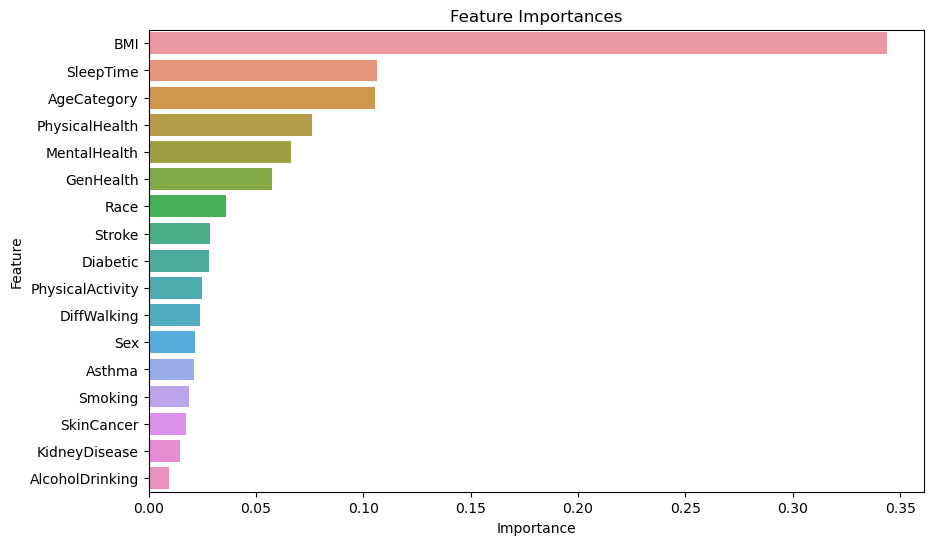

In [159]:
feature_importances = random_forest_model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Confusion Matrix (RandomForestClassifier)

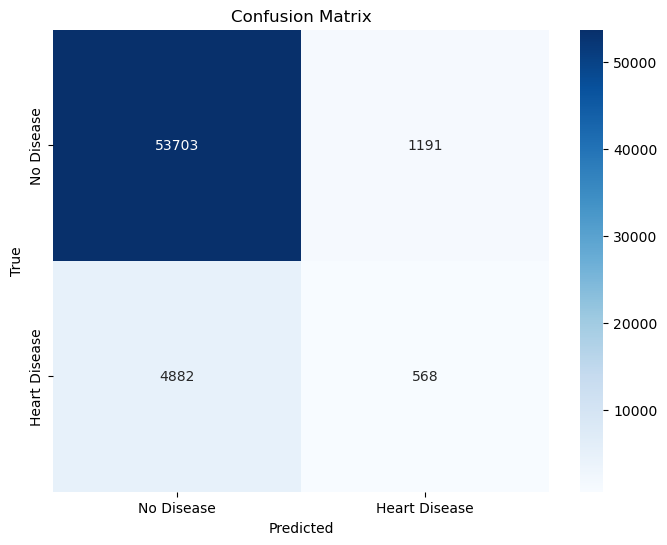

In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score ,  precision_score, recall_score , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

X_test = test_set[features]
y_test = test_set[target_variable]

y_pred = random_forest_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Values of TN, FP, FN, TP

In [161]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Print values
print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'True Negative (TN): {TN}')
print(f'False Negative (FN): {FN}')

True Positive (TP): 568
False Positive (FP): 1191
True Negative (TN): 53703
False Negative (FN): 4882


# Performance Measures

## Accuracy

In [162]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8993603340845817


## Precision

In [163]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

Precision: 0.3229107447413303


## Recall

In [164]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')


Recall: 0.10422018348623853


## Number of samples

In [165]:
num_samples = len(y_test)
print(f'Number of Samples: {num_samples}')

Number of Samples: 60344


## Measure – F1

In [166]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.15758080177555833


## Measuring Accuracy Using Cross-Validation

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

scoring_metric = make_scorer(accuracy_score)
cross_val_accuracy = cross_val_score(random_forest_model, X_test, y_test, cv=5, scoring=scoring_metric)
print("Cross-Validation Accuracy: {:.2f}% (+/- {:.2f}%)".format(cross_val_accuracy.mean() * 100, cross_val_accuracy.std() * 2 * 100))

Cross-Validation Accuracy: 90.40% (+/- 0.14%)


# ROC Curve

Area under the ROC curve (AUC): 0.78


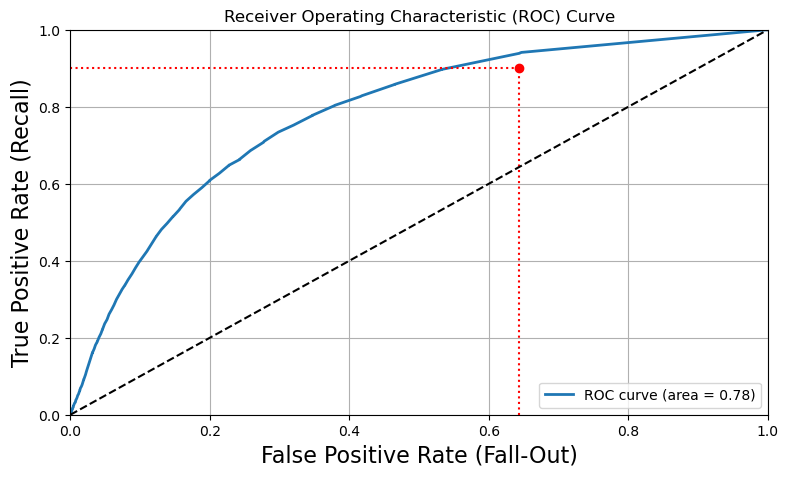

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, recall_90_precision, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
    plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
    plt.plot([fpr_90], [recall_90_precision], "ro")
    
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

recall_90_precision = 0.9

y_probs = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

print('Area under the ROC curve (AUC): {:.2f}'.format(roc_auc))

plt.figure(figsize=(9,5))
plot_roc_curve(fpr, tpr, recall_90_precision, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# PR curve

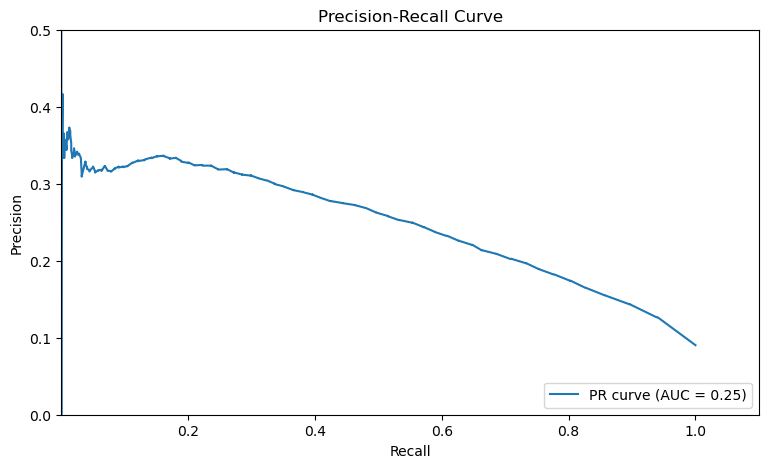

In [169]:
from sklearn.metrics import precision_recall_curve, average_precision_score 
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = average_precision_score(y_test, y_probs)

plt.figure(figsize=(9, 5))
plt.plot(recall, precision, label='PR curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim(0,0.5)
plt.xlim(0.0001,1.1)
plt.legend(loc='lower right')
plt.show()


# Making a prediction using LogisticRegression

In [170]:
from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(train_set[features], train_set[target_variable])
predictions = logistic_reg_model.predict(test_set[features])

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prediction accuracy by using LogisticRegression

In [171]:
input_values_list = [
    ['27.41', '1', '0', '0', '7', '0', '1', '1', '8', '3', '2', '0', '1', '6', '1', '0', '0']
]

input_array = np.array(input_values_list).astype(float)
probability_estimates = logistic_reg_model.predict_proba(input_array)
threshold = 0.5
predictions = [1 if prob[1] > threshold else 0 for prob in probability_estimates]

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f" He has heart disease.")
    else:
        print(f" He does not have heart disease.")

 He does not have heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Confusion Matrix (LogisticRegression)

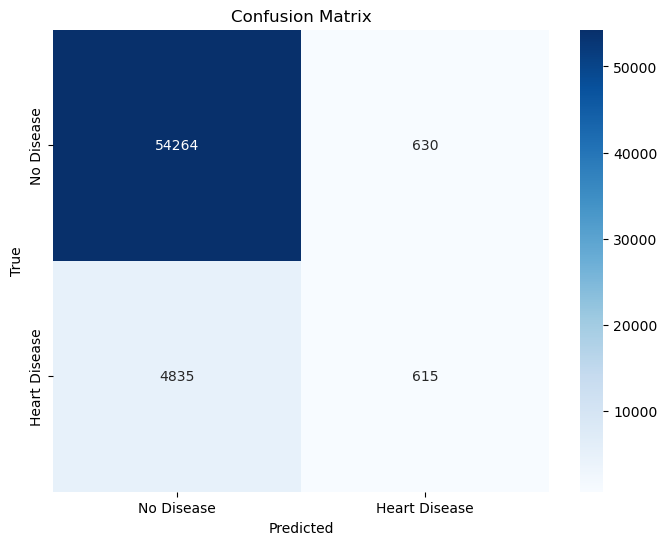

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score ,  precision_score, recall_score , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

X_test = test_set[features]
y_test = test_set[target_variable]
predictions = logistic_reg_model.predict(test_set[features])
cm = confusion_matrix(test_set[target_variable], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Values of TN, FP, FN, TP

In [173]:
TN, FP, FN, TP = confusion_matrix(test_set[target_variable], predictions).ravel()
print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'True Negative (TN): {TN}')
print(f'False Negative (FN): {FN}')

True Positive (TP): 615
False Positive (FP): 630
True Negative (TN): 54264
False Negative (FN): 4835


# Performance Measures

## Precision

In [174]:
precision = precision_score(test_set[target_variable], predictions)
print(f'Precision: {precision}')

Precision: 0.4939759036144578


## Recall

In [175]:
recall = recall_score(test_set[target_variable], predictions)
print(f'Recall: {recall}')

Recall: 0.11284403669724771


## Number of samples

In [176]:
num_samples = len(test_set[target_variable])
print(f'Number of Samples: {num_samples}')

Number of Samples: 60344


## Measure – F1

In [177]:
f1 = f1_score(test_set[target_variable], predictions)
print(f'F1 Score: {f1}')

F1 Score: 0.1837191934279313


## ROC Curve

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under the ROC curve (AUC): 0.81


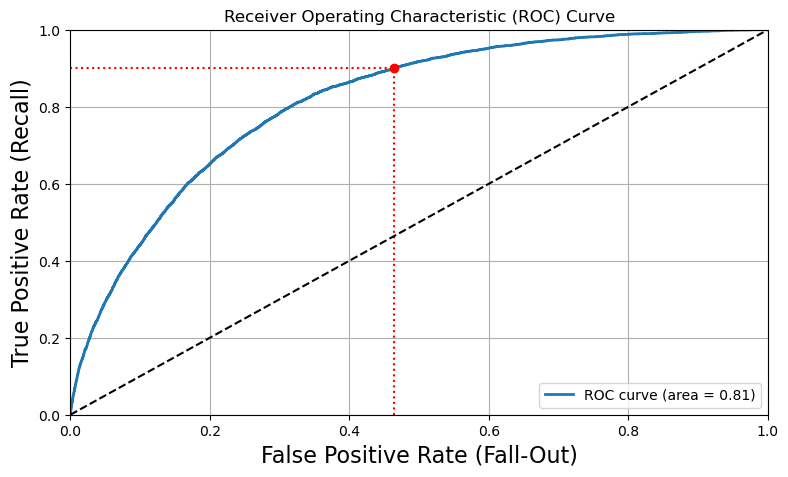

In [178]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, recall_90_precision, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
    plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
    plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
    plt.plot([fpr_90], [recall_90_precision], "ro")
    
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

recall_90_precision = 0.9
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(train_set[features], train_set[target_variable])
predictions = logistic_reg_model.predict_proba(test_set[features])[:, 1]
fpr, tpr, thresholds = roc_curve(test_set[target_variable], predictions)
roc_auc = auc(fpr, tpr)

print('Area under the ROC curve (AUC): {:.2f}'.format(roc_auc))

plt.figure(figsize=(9,5))
plot_roc_curve(fpr, tpr, recall_90_precision, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## PR curve

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


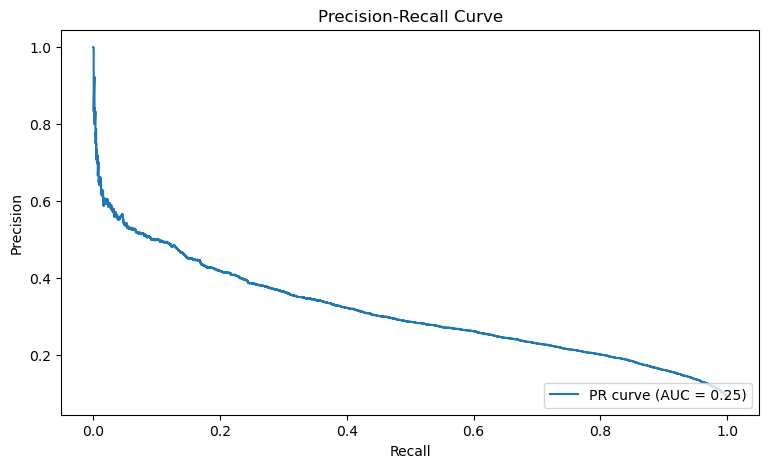

In [179]:
from sklearn.metrics import precision_recall_curve, average_precision_score 
import matplotlib.pyplot as plt

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(train_set[features], train_set[target_variable])

predictions = logistic_reg_model.predict_proba(test_set[features])[:, 1]
precision, recall, _ = precision_recall_curve(test_set[target_variable], predictions)
average_precision = average_precision_score(test_set[target_variable], predictions)

plt.figure(figsize=(9, 5))
plt.plot(recall, precision, label='PR curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()


# Making a prediction using DecisionTreeClassifier

In [180]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(train_set[features], train_set[target_variable])
predictions = decision_tree_model.predict(test_set[features])

## Prediction accuracy by using DecisionTreeClassifier

In [181]:
new_input_values = [['27.41', '1', '0', '0', '7', '0', '1', '1', '8', '3', '2', '0', '1', '6', '1', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
new_predictions = decision_tree_model.predict(new_input_array)
if new_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")

He has heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Confusion Matrix (DecisionTreeClassifier)

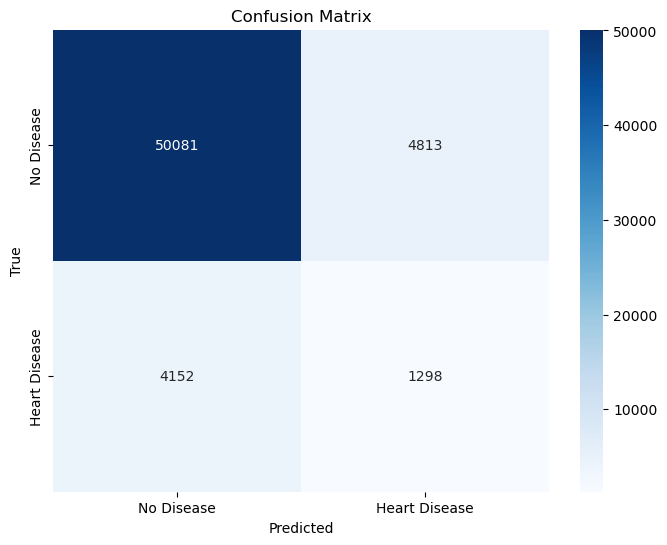

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score ,  precision_score, recall_score , f1_score
import seaborn as sns
import matplotlib.pyplot as plt

X_test = test_set[features]
y_test = test_set[target_variable]
predictions = decision_tree_model.predict(test_set[features])
cm = confusion_matrix(test_set[target_variable], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Values of TN, FP, FN, TP

In [183]:
TN, FP, FN, TP = confusion_matrix(test_set[target_variable], predictions).ravel()
print(f'True Positive (TP): {TP}')
print(f'False Positive (FP): {FP}')
print(f'True Negative (TN): {TN}')
print(f'False Negative (FN): {FN}')

True Positive (TP): 1298
False Positive (FP): 4813
True Negative (TN): 50081
False Negative (FN): 4152


# Performance Measures

## Precision

In [184]:
precision = precision_score(test_set[target_variable], predictions)
print(f'Precision: {precision}')

Precision: 0.21240386188839797


## Recall

In [185]:
recall = recall_score(test_set[target_variable], predictions)
print(f'Recall: {recall}')

Recall: 0.2381651376146789


## Number of samples

In [186]:
num_samples = len(test_set[target_variable])
print(f'Number of Samples: {num_samples}')

Number of Samples: 60344


## Measure – F1

In [187]:
f1 = f1_score(test_set[target_variable], predictions)
print(f'F1 Score: {f1}')

F1 Score: 0.22454804947668885


# Ensemble Learning

## Hard votingClassifier

In [188]:
from sklearn.ensemble import VotingClassifier
hard_voting_model = VotingClassifier(estimators=[
    ('logistic', logistic_reg_model),
    ('decision_tree', decision_tree_model),
    ('random_forest', random_forest_model)
], voting='hard')
hard_voting_model.fit(train_set[features], train_set[target_variable])
predictions = hard_voting_model.predict(test_set[features])

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prediction using hard voting

In [189]:
new_input_values = [['36.09', '1', '0', '0', '30', '0', '1', '0', '12', '5', '0', '0', '1', '7', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
voting_predictions = hard_voting_model.predict(new_input_array)
if voting_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")

He has heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [190]:
from sklearn.metrics import accuracy_score
classifiers = [logistic_reg_model, decision_tree_model, random_forest_model, hard_voting_model]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9094359008352114
DecisionTreeClassifier 0.8512693888373326
RandomForestClassifier 0.8992443324937027


D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9030392416810288


## Soft VotingClassifier

In [191]:
soft_voting_model = VotingClassifier(estimators=[
    ('logistic', logistic_reg_model),
    ('decision_tree', decision_tree_model),
    ('random_forest', random_forest_model)
], voting='soft')
soft_voting_model.fit(train_set[features], train_set[target_variable])
predictions = soft_voting_model.predict(test_set[features])

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Prediction using  soft voting

In [192]:
new_input_values = [['29.84', '1', '0', '0', '5', '0', '0', '1', '5', '5', '0', '1', '2', '8', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
voting_probabilities = soft_voting_model.predict_proba(new_input_array)
threshold = 0.5
voting_predictions = [1 if prob[1] > threshold else 0 for prob in voting_probabilities]
if voting_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")


He has heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [193]:
from sklearn.metrics import accuracy_score
classifiers = [logistic_reg_model, decision_tree_model, random_forest_model, soft_voting_model]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9094359008352114
DecisionTreeClassifier 0.8524459764019621
RandomForestClassifier 0.8996254805780194


D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.8928476733395201


## BaggingClassifier

In [194]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,  
    bootstrap=True, 
    random_state=42
)

bagging_model.fit(train_set[features], train_set[target_variable])
predictions = bagging_model.predict(test_set[features])

D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Prediction using baggingclassifier

In [195]:
new_input_values = [['29.84', '1', '0', '0', '5', '0', '0', '1', '5', '5', '0', '1', '2', '8', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
bagging_predictions = bagging_model.predict(new_input_array)
if bagging_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")


He has heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [196]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8928476733395201


## PastingClassifier

In [197]:
pasting_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,  # Example value, adjust as needed
    bootstrap=False,  # Set to False for pasting (sampling without replacement)
    random_state=42
)

pasting_model.fit(train_set[features], train_set[target_variable])
predictions = pasting_model.predict(test_set[features])

D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Prediction using pastingClassifier

In [198]:
new_input_values = [['29.84', '1', '0', '0', '5', '0', '0', '1', '5', '5', '0', '1', '2', '8', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
pasting_predictions = pasting_model.predict(new_input_array)
if pasting_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")


He has heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


## GradientBoosting Classifier

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=100,  
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)

gradient_boosting_model.fit(train_set[features], train_set[target_variable])
predictions = gradient_boosting_model.predict(test_set[features])

new_input_values = [['29.84', '1', '0', '0', '5', '0', '0', '1', '5', '5', '0', '1', '2', '8', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
gb_predictions = gradient_boosting_model.predict(new_input_array)

if gb_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")


He does not have heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


## AdaBoost Classifier

In [200]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=50, 
    learning_rate=0.5,  
    algorithm='SAMME.R', 
    random_state=42
)

adaboost_model.fit(train_set[features], train_set[target_variable])
prediction = adaboost_model.predict(test_set[features])

new_input_values = [['29.84', '1', '0', '0', '5', '0', '0', '1', '5', '5', '0', '1', '2', '8', '0', '0', '0']]
new_input_array = np.array(new_input_values).astype(float)
adaboost_predictions = adaboost_model.predict(new_input_array)

if adaboost_predictions[0] == 1:
    print("He has heart disease.")
else:
    print("He does not have heart disease.")


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


He does not have heart disease.


D:\Programs\python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# Hyperparameter tuning 

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create classifiers
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
voting_model = VotingClassifier(estimators=[
    ('logistic', logreg_model),
    ('decision_tree', dt_model),
    ('random_forest', rf_model)
], voting='hard')

soft_voting_model = VotingClassifier(estimators=[
    ('logistic', logreg_model),
    ('decision_tree', dt_model),
    ('random_forest', rf_model)
], voting='soft')

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
pasting_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap=False)
gb_model = GradientBoostingClassifier()
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

classifiers = {
    'Logistic Regression': {
        'model': logreg_model,
        'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
    },
    'Random Forest': {
        'model': rf_model,
        'param_grid': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    },
    'Decision Tree': {
        'model': dt_model,
        'param_grid': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    },
    'Voting Classifier': {
        'model': voting_model,
        'param_grid': {}  
    },
    'Soft Voting Classifier': {
        'model': soft_voting_model,
        'param_grid': {}
    },
    'Bagging Classifier': {
        'model': bagging_model,
        'param_grid': {'n_estimators': [10, 20, 30], 'max_samples': [0.8, 1.0], 'bootstrap': [True, False]}
    },
    'Pasting Classifier': {
        'model': pasting_model,
        'param_grid': {'n_estimators': [10, 20, 30], 'max_samples': [0.8, 1.0], 'bootstrap': [True, False]}
    },
    'Gradient Boosting': {
        'model': gb_model,
        'param_grid': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    },
    'AdaBoost': {
        'model': adaboost_model,
        'param_grid': {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}
    }
}

best_models = {}
for clf_name, clf_info in classifiers.items():
    print(f"Performing GridSearchCV for {clf_name}...")
    
    clf = clf_info['model']
    param_grid = clf_info['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_models[clf_name] = grid_search.best_estimator_

    print(f"Best Parameters for {clf_name}: {best_params}")

    y_pred_best = grid_search.best_estimator_.predict(X_test)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    print(f'Best Model Accuracy on Test Set for {clf_name}: {accuracy_best}\n')

best_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {accuracy_score(y_test, best_model.predict(X_test))}")


Performing GridSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy on Test Set for Logistic Regression: 0.9102147686596844

Performing GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Model Accuracy on Test Set for Random Forest: 0.9109439215166379

Performing GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Model Accuracy on Test Set for Decision Tree: 0.9083421715497813

Performing GridSearchCV for Voting Classifier...


D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Voting Classifier: {}
Best Model Accuracy on Test Set for Voting Classifier: 0.9031386716160679

Performing GridSearchCV for Soft Voting Classifier...


D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Soft Voting Classifier: {}
Best Model Accuracy on Test Set for Soft Voting Classifier: 0.8925659551902426

Performing GridSearchCV for Bagging Classifier...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for Bagging Classifier: {'bootstrap': True, 'max_samples': 0.8, 'n_estimators': 30}
Best Model Accuracy on Test Set for Bagging Classifier: 0.9011832162269654

Performing GridSearchCV for Pasting Classifier...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for Pasting Classifier: {'bootstrap': True, 'max_samples': 0.8, 'n_estimators': 20}
Best Model Accuracy on Test Set for Pasting Classifier: 0.9006032082725706

Performing GridSearchCV for Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Model Accuracy on Test Set for Gradient Boosting: 0.9109770648283176

Performing GridSearchCV for AdaBoost...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Model Accuracy on Test Set for AdaBoost: 0.910380485218083

The best model is Gradient Boosting with an accuracy of 0.9109770648283176


In [202]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
voting_model = VotingClassifier(estimators=[
    ('logistic', logreg_model),
    ('decision_tree', dt_model),
    ('random_forest', rf_model)
], voting='hard')

soft_voting_model = VotingClassifier(estimators=[
    ('logistic', logreg_model),
    ('decision_tree', dt_model),
    ('random_forest', rf_model)
], voting='soft')

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
pasting_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap=False)
gb_model = GradientBoostingClassifier()
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

classifiers = {
    'Logistic Regression': {
        'model': logreg_model,
        'param_dist': {'C': uniform(0.001, 100), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
    },
    'Random Forest': {
        'model': rf_model,
        'param_dist': {'n_estimators': randint(50, 150), 'max_depth': [None, 10, 20], 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 4)}
    },
    'Decision Tree': {
        'model': dt_model,
        'param_dist': {'max_depth': [None, 10, 20], 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 4)}
    },
    'Voting Classifier': {
        'model': voting_model,
        'param_dist': {}  
    },
    'Soft Voting Classifier': {
        'model': soft_voting_model,
        'param_dist': {}
    },
    'Bagging Classifier': {
        'model': bagging_model,
        'param_dist': {'n_estimators': randint(10, 30), 'max_samples': [0.8, 1.0], 'bootstrap': [True, False]}
    },
    'Pasting Classifier': {
        'model': pasting_model,
        'param_dist': {'n_estimators': randint(10, 30), 'max_samples': [0.8, 1.0], 'bootstrap': [True, False]}
    },
    'Gradient Boosting': {
        'model': gb_model,
        'param_dist': {'n_estimators': randint(50, 150), 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    },
    'AdaBoost': {
        'model': adaboost_model,
        'param_dist': {'n_estimators': randint(50, 150), 'learning_rate': [0.1, 0.5, 1.0]}
    }
}

best_models = {}
for clf_name, clf_info in classifiers.items():
    print(f"Performing RandomizedSearchCV for {clf_name}...")
    
    clf = clf_info['model']
    param_dist = clf_info['param_dist']

    random_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_models[clf_name] = random_search.best_estimator_

    print(f"Best Parameters for {clf_name}: {best_params}")

    y_pred_best = random_search.best_estimator_.predict(X_test)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    print(f'Best Model Accuracy on Test Set for {clf_name}: {accuracy_best}\n')

best_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]

print(f"The best model is {best_model_name} with an accuracy of {accuracy_score(y_test, best_model.predict(X_test))}")

Performing RandomizedSearchCV for Logistic Regression...


D:\Programs\python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 49.705857029615245, 'penalty': 'l2', 'solver': 'saga'}
Best Model Accuracy on Test Set for Logistic Regression: 0.9099661938220867

Performing RandomizedSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 106}
Best Model Accuracy on Test Set for Random Forest: 0.9108113482699192

Performing RandomizedSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Model Accuracy on Test Set for Decision Tree: 0.9081267400238632

Performing RandomizedSearchCV for Voting Classifier...


D:\Programs\python\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Voting Classifier: {}
Best Model Accuracy on Test Set for Voting Classifier: 0.9035198197003844

Performing RandomizedSearchCV for Soft Voting Classifier...


D:\Programs\python\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\Programs\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Soft Voting Classifier: {}
Best Model Accuracy on Test Set for Soft Voting Classifier: 0.8933779663263953

Performing RandomizedSearchCV for Bagging Classifier...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for Bagging Classifier: {'bootstrap': True, 'max_samples': 0.8, 'n_estimators': 26}
Best Model Accuracy on Test Set for Bagging Classifier: 0.901232931194485

Performing RandomizedSearchCV for Pasting Classifier...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for Pasting Classifier: {'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 18}
Best Model Accuracy on Test Set for Pasting Classifier: 0.8987637544743471

Performing RandomizedSearchCV for Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 110}
Best Model Accuracy on Test Set for Gradient Boosting: 0.9111924963542357

Performing RandomizedSearchCV for AdaBoost...


D:\Programs\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 103}
Best Model Accuracy on Test Set for AdaBoost: 0.9101816253480047

The best model is Gradient Boosting with an accuracy of 0.9111924963542357
